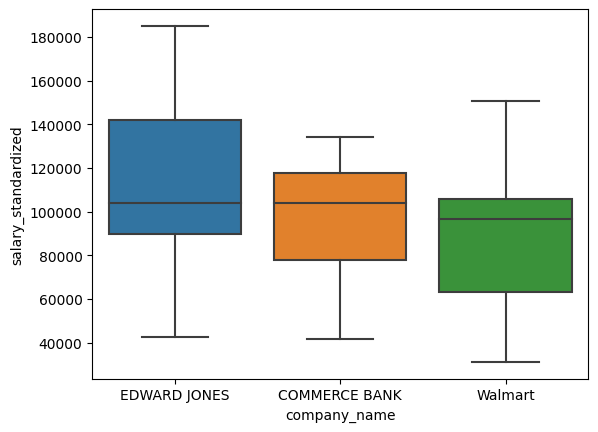

In [53]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


cleaned_df = pd.read_csv("./data/cleaned_jobs_info_skills.csv")


def generate_chart(option):
    #histogram using salary_standardized column values
    #esta si va, aunque no se para que 
    if option == 0:
        cleaned_df["salary_standardized"].plot.hist(bins=20)


    #What are the most sought-after skills for data-analyst positions?

    default_columns = ["id", "title", "company_name", 
    "location", "via", "extensions", "posted_at", 
    "schedule_type", "work_from_home", "date_time",
    "id_jobs", "description_tokens",
    "id_skills", "salary_pay", "salary_rate", 
    "salary_avg", "salary_min", "salary_max", 
    "salary_hourly", "salary_yearly", "salary_standardized", "Unnamed: 0"]

    #for the following chart, include only skills columns, and exclude the rest of them
    sought_after_skills = []

    for column in cleaned_df.columns:
        if column not in default_columns and column != " " and column != "Unnamed: 0.1" and column != "Unnamed: 140":
            sought_after_skills.append([column, cleaned_df[column].sum()])

    skills_df = pd.DataFrame(sought_after_skills, columns = ['skill', 'counter'])

    if option == 1:
        ax = skills_df[skills_df['skill'] != ""].groupby(["skill"])["counter"].sum().sort_values(ascending=False).head(10).plot.bar()
        ax.figure.savefig("./images/01-skills.jpg")

    #Which **cities** are hiring the most data-analysts?
    if option == 2:
        ax = cleaned_df[(cleaned_df['location'] != 'Anywhere') & (cleaned_df['location'] != 'United States')].groupby(['location'])['salary_standardized'].count().sort_values(ascending=False).head(10).plot.barh(x='location', y='salary_standarized')
        ax.figure.savefig("./images/02-cities.jpg")


    #Which **companies** are hiring the most data-analysts?
    if option == 3:
        ax = cleaned_df.groupby("company_name")["company_name"].count().sort_values(ascending=False).head(10).plot.bar()
        ax.figure.savefig("./images/03-companies.jpg")

    #How do salary outcomes differ between remote-work & non-remote work?

    if option == 4:
        ax = cleaned_df.groupby("work_from_home")["salary_standardized"].mean().sort_values(ascending=False).head(10).plot.bar()
        ax.figure.savefig("./images/04-work_from_home.jpg")

    if option == 5:
        sns.boxplot(data=cleaned_df, x="work_from_home", y="salary_standardized")
        plt.savefig('./images/05-work_from_home.png')

    #What are the top 5 most-requested skills?
    # Visualize the distribution of `standard_salaries` for `sql` positions
    if option == 6:
        sns.boxplot(data=cleaned_df, x="sql", y="salary_standardized")
        plt.savefig('./images/06-sql.png')
    # Visualize the distribution of `standard_salaries` for `python` positions
    if option == 7:
        sns.boxplot(data=cleaned_df, x="python", y="salary_standardized")
        plt.savefig('./images/07-python.png')
    # Visualize the distribution of `standard_salaries` for `tableau` positions
    if option == 8:
        sns.boxplot(data=cleaned_df, x="tableau", y="salary_standardized")
        plt.savefig('./images/08-tableau.png')


    # Calculate & visualize the frequency of city-occurence in your dataframe
    # What are the top 5 cities for data analyst positions?
    # "Kansas City, MO", "Jefferson City, MO", "Oklahoma City, OK", "Columbia, MO", "Tulsa, MO"
    # Visualize the distribution of `standard_salaries` for `Kansas City, MO` positions
    # Visualize the distribution of `standard_salaries` for `Jefferson City, MO` positions
    # Visualize the distribution of `standard_salaries` for `Oklahoma City, OK` positions
    if option == 9:
        sns.boxplot(data=cleaned_df[(cleaned_df["location"] == "Kansas City, MO") | 
                                    (cleaned_df["location"] == "Jefferson City, MO") |
                                    (cleaned_df["location"] == "Oklahoma City, OK")], x="location", y="salary_standardized")
        plt.savefig('./images/09-salariesx3cities.png')


    # Calculate & visualize the frequency of company-occurence in your dataframe
    # What are the top 5 companies for data analyst positions?
    # Visualize the distribution of `standard_salaries` for 3 companies of your choice (that can be found in the dataframe)
    if option == 10:
        sns.boxplot(data=cleaned_df[(cleaned_df["company_name"] == "EDWARD JONES") | 
                                    (cleaned_df["company_name"] == "Walmart") |
                                    (cleaned_df["company_name"] == "COMMERCE BANK")], 
                                    x="company_name", y="salary_standardized")
        plt.savefig('./images/10-salariesx3companies.png')


generate_chart(10)
